In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Налаштування, щоб бачити всі стовпці при виводі
pd.set_option('display.max_columns', None)

In [2]:
# 1. Прочитайте CSV файл (використовуйте метод read_csv)
df_youtube = pd.read_csv('Global YouTube Statistics.csv', encoding='latin-1')

In [4]:
# 2. Виведення перших п'яти рядків (використовується метод head)
df_youtube.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
# 3. Виведіть розміри датасету (використовується метод shape)
print(df_youtube.shape)

(995, 28)


In [6]:
# 4. Перевірка, чи у всіх рядків вистачає даних: виведення кількості пропусків (isna та sum).
# Якщо є пропуски, зміна їх на NaN, потім тип даних на числовий.

# Виводимо поточні пропуски
print("Пропуски до очищення:\n", df_youtube.isna().sum())

# Замінюємо можливі текстові "nan" на справжні NaN
df_youtube = df_youtube.replace('nan', np.nan)

# Приклад перетворення колонок, які будуть потрібні для обчислень, у числовий тип (пропускаючи помилки - coerce)
# Це автоматично перетворить некоректні значення на NaN
cols_to_fix = ['video views', 'uploads', 'subscribers']
for col in cols_to_fix:
    df_youtube[col] = pd.to_numeric(df_youtube[col], errors='coerce')

Пропуски до очищення:
 rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                        

In [11]:
# 5. Заміна комірок з пропущеними значеннями на середні за стовпцем. І тип даних на float.
# Заповнюємо пропуски середнім значенням тільки для числових колонок
df_youtube['video views'] = df_youtube['video views'].fillna(df_youtube['video views'].mean())
df_youtube['uploads'] = df_youtube['uploads'].fillna(df_youtube['uploads'].mean())
df_youtube['subscribers'] = df_youtube['subscribers'].fillna(df_youtube['subscribers'].mean())

# Перетворення на float (хоча після fillna mean вони і так стануть float)
df_youtube['video views'] = df_youtube['video views'].astype(float)

In [12]:
# 6. Повторна перевірка кількості пропусків.
print(df_youtube[['video views', 'uploads', 'subscribers']].isna().sum())

video views    0
uploads        0
subscribers    0
dtype: int64


In [13]:
# 7. Перевірка, скільки унікальних країн представлено у колонці "Country"
unique_countries = df_youtube['Country'].nunique()
print("Кількість унікальних країн:", unique_countries)
print("Список країн:", df_youtube['Country'].unique())

Кількість унікальних країн: 49
Список країн: ['India' 'United States' nan 'Japan' 'Russia' 'South Korea'
 'United Kingdom' 'Canada' 'Brazil' 'Argentina' 'Chile' 'Cuba'
 'El Salvador' 'Pakistan' 'Philippines' 'Thailand' 'Colombia' 'Barbados'
 'Mexico' 'United Arab Emirates' 'Spain' 'Saudi Arabia' 'Indonesia'
 'Turkey' 'Venezuela' 'Kuwait' 'Jordan' 'Netherlands' 'Singapore'
 'Australia' 'Italy' 'Germany' 'France' 'Sweden' 'Afghanistan' 'Ukraine'
 'Latvia' 'Switzerland' 'Vietnam' 'Malaysia' 'China' 'Iraq' 'Egypt'
 'Andorra' 'Ecuador' 'Morocco' 'Peru' 'Bangladesh' 'Finland' 'Samoa']


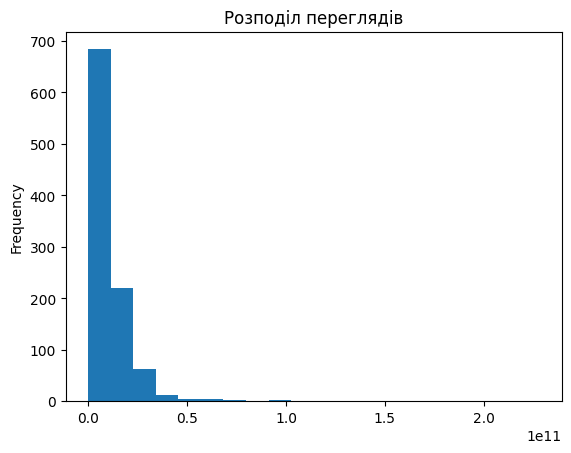

In [14]:
# 8. Побудова діаграми розподілу переглядів (використовується kind='hist'):
df_youtube['video views'].plot(kind='hist', bins=20, title='Розподіл переглядів')
plt.show()

In [ ]:
# 9. Визначення максимальної, мінімальної, середньої кількісті переглядів (використовуються методи max, min, mean)
print("Максимальні перегляди:", df_youtube['video views'].max())
print("Мінімальні перегляди:", df_youtube['video views'].min())
print("Середні перегляди:", df_youtube['video views'].mean())

In [15]:
# 10. Знаходження країн, де найбільше відео було завантажено на YouTube
# Групуємо за країною і сумуємо кількість uploads
country_uploads = df_youtube.groupby('Country')['uploads'].sum()
print("Країна з найбільшою кількістю завантажень:", country_uploads.idxmax())

Країна з найбільшою кількістю завантажень: India


In [16]:
# 11. Знаходження відео з найбільшою та найменшою кількістю завантажень uploads.
max_uploads_row = df_youtube.loc[df_youtube['uploads'].idxmax()]
min_uploads_row = df_youtube.loc[df_youtube['uploads'].idxmin()]

print("Канал з найбільшою к-стю uploads:", max_uploads_row['Youtuber'], "(", max_uploads_row['uploads'], ")")
print("Канал з найменшою к-стю uploads:", min_uploads_row['Youtuber'], "(", min_uploads_row['uploads'], ")")

Канал з найбільшою к-стю uploads: ABP NEWS ( 301308 )
Канал з найменшою к-стю uploads: Music ( 0 )


In [17]:
# 1. Прочитайте csv файл (метод read_csv)
df_books = pd.read_csv('bestsellers with categories.csv')

# Виведення перших 10 рядків (метод head)
print(df_books.head(10))

# Виведення розмірів датасету (метод shape)
print("Розміри:", df_books.shape)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   
5      A Dance with Dragons (A Song of Ice and Fire)   
6  A Game of Thrones / A Clash of Kings / A Storm...   
7                     A Gentleman in Moscow: A Novel   
8      A Higher Loyalty: Truth, Lies, and Leadership   
9                          A Man Called Ove: A Novel   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fic

In [ ]:
# Про скільки книг зберігає дані датасет? (Це кількість рядків)
print("Кількість книг у датасеті:", df_books.shape[0])

In [18]:
# Зміна назви всіх колонок: назва з маленької букви, без пробілів через підкреслення.
df_books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df_books.columns)

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


In [19]:
# Виведення кількості пропусків у кожному стовпчику.
print(df_books.isna().sum())

# Чи є в якихось змінних пропуски? (Так / ні)
has_na = df_books.isna().sum().sum() > 0
print("Чи є пропуски?", "Так" if has_na else "Ні")

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Чи є пропуски? Ні


In [ ]:
# Перевірка методом unique: Які є унікальні жанри в стовпці genre
unique_genres = df_books['genre'].unique()
print("Унікальні жанри:", unique_genres)

In [20]:
# Визначення максимальної, мінімальної, медіани цін за допомогою методів max, min, mean, median
print("Максимальна ціна:", df_books['price'].max())
print("Мінімальна ціна:", df_books['price'].min())
print("Середня ціна:", df_books['price'].mean())
print("Медіанна ціна:", df_books['price'].median())

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [21]:
# Який рейтинг у датасеті найвищий?
max_rating = df_books['user_rating'].max()
print("Найвищий рейтинг:", max_rating)

# Скільки книг мають такий рейтинг?
count_max_rating = df_books[df_books['user_rating'] == max_rating].shape[0]
print("Кількість книг з найвищим рейтингом:", count_max_rating)

Найвищий рейтинг: 4.9
Кількість книг з найвищим рейтингом: 52


In [22]:
# Яка книга має найбільше відгуків?
max_reviews_row = df_books.loc[df_books['reviews'].idxmax()]
print("Книга з найбільшою к-стю відгуків:", max_reviews_row['name'])

Книга з найбільшою к-стю відгуків: Where the Crawdads Sing


In [28]:
# З тих книг, що потрапили до Топ-50 у 2010 році, яка книга найдорожча?
books_2010 = df_books[df_books['year'] == 2010]
most_expensive_2010 = books_2010.loc[books_2010['price'].idxmax()]
print("Найдорожча книга 2010 року:", most_expensive_2010['name'])

Найдорожча книга 2010 року: Publication Manual of the American Psychological Association, 6th Edition


In [27]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2012 році
fiction_2012_count = df_books[(df_books['year'] == 2012) & (df_books['genre'] == 'Fiction')].shape[0]
print("Кількість книг Fiction у 2012:", fiction_2012_count)

Кількість книг Fiction у 2012: 21


In [26]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або метод isin)?
rating_49_years = df_books[(df_books['user_rating'] == 4.9) & (df_books['year'].isin([2010, 2011]))]
print("Кількість книг з рейтингом 4.9 у 2010/2011:", rating_49_years.shape[0])

Кількість книг з рейтингом 4.9 у 2010/2011: 1


In [25]:
# Виведення максимальної і мінімальної ціни для жанру Fiction і NonFiction (за допомогою методів groupby та agg)
genre_prices = df_books.groupby('genre')['price'].agg(['max', 'min'])
print(genre_prices)

             max  min
genre                
Fiction       82    0
Non Fiction  105    0
